
# <span style="color:rgb(213,80,0)">Analysis of the modified customer loyalty data in the square\-root scale.</span>

This file creates Figures A.72\-A.74

## Beginning of code

In [1]:
close all
clear
load ConsLoyaltyRet.mat
Xytable=ConsLoyaltyRet(:,2:end);
nameXy=Xytable.Properties.VariableNames;
nameX=nameXy(1:end-1);
X=Xytable{:,1:end-1};
y=Xytable{:,end};
ytra=sqrt(y);
n=length(y);

% Contaminate the data
ss=Xytable.Price==10 & Xytable.NegativePublicity<0.2;
kk=3;
y(ss)=y(ss)-kk;
Xytable{ss,end}= Xytable{ss,end}-kk;
sqy=sqrt(y);
prin=0;

## Create Figure A.72

Monitoring of res in sqrt scale LMS


In [2]:
[outLXSsq]=LXS(sqy,X,'nsamp',50000);

Total estimated time to complete LMS:  1.68 seconds

In [3]:
% Forward Search
[outsq]=FSReda(sqy,X,outLXSsq.bs);

m=100
m=200
m=300
m=400
m=500
m=600
m=700
m=800
m=900
m=1000
m=1100
m=1200
m=1300
m=1400
m=1500
m=1600
m=1700


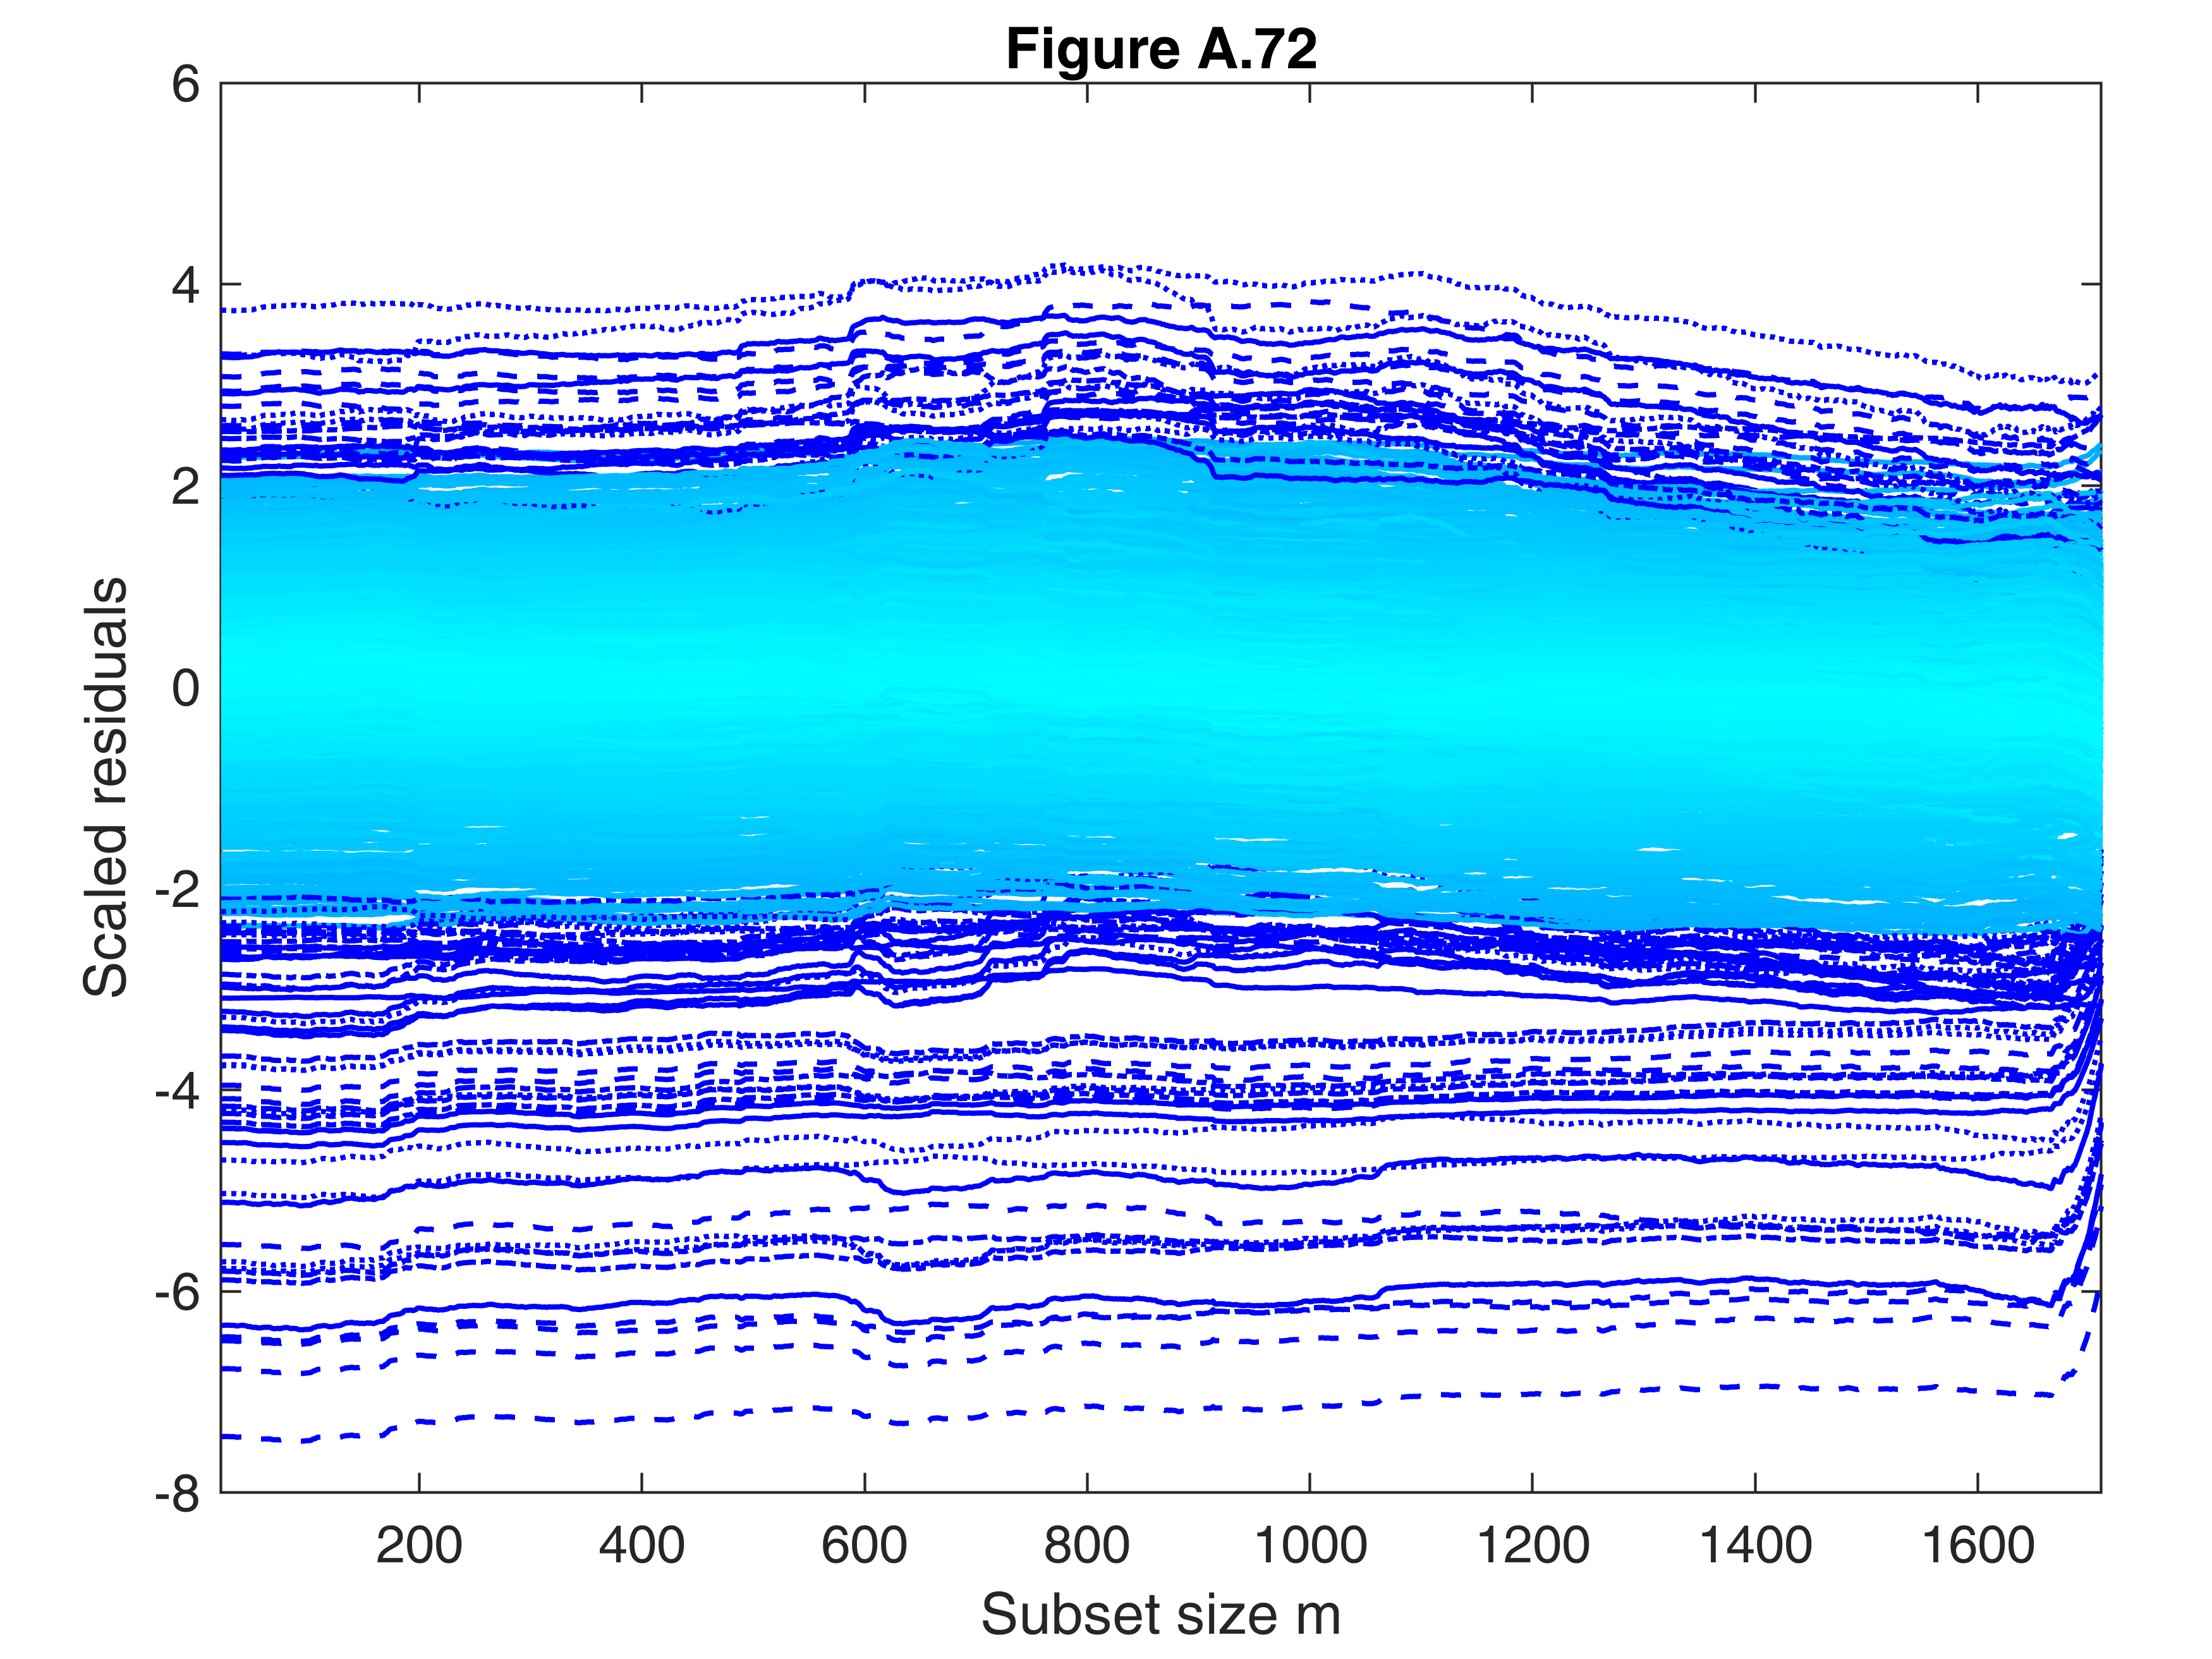

In [4]:

resfwdplot(outsq,'datatooltip','','tag','pl_resfwdini')
if prin==1
    % print to postscript
    print -depsc modCLmonressqrt.eps;
else
    title('Figure A.72')
    set(gcf,"Name",'Figure A.72')
end

In [5]:
drawnow

## Create Figure A.73

FSR in sqrt scale


In [6]:
outsqrty=FSR(sqy,X,'plots',0);

Observed curve of r_min is at least 10 times greater than 99.99% envelope
--------------------------------------------------
-------------------------
Signal detection loop
Tentative signal in central part of the search: step m=1483 because
rmin(1483,1711)>99.99% and rmin(1482,1711)>99.99% and rmin(1484,1711)>99.99%
-------------------
Signal validation exceedance of upper envelopes
Validated signal
-------------------------------
Start resuperimposing envelopes from step m=1482
Superimposition stopped because r_{min}(1579,1647)>99.9% envelope
Subsample of 1646 units is not homogeneous because the curve was above 99.99% and later it was below 1%
----------------------------------------
Probably there are two overlapping groups
Using the criterion of the maximum, the group of homogenous obs. is= 1646
----------------------------
Final output
Number of units declared as outliers=65
Summary of the exceedances
           1          99         999        9999       99999
           0       


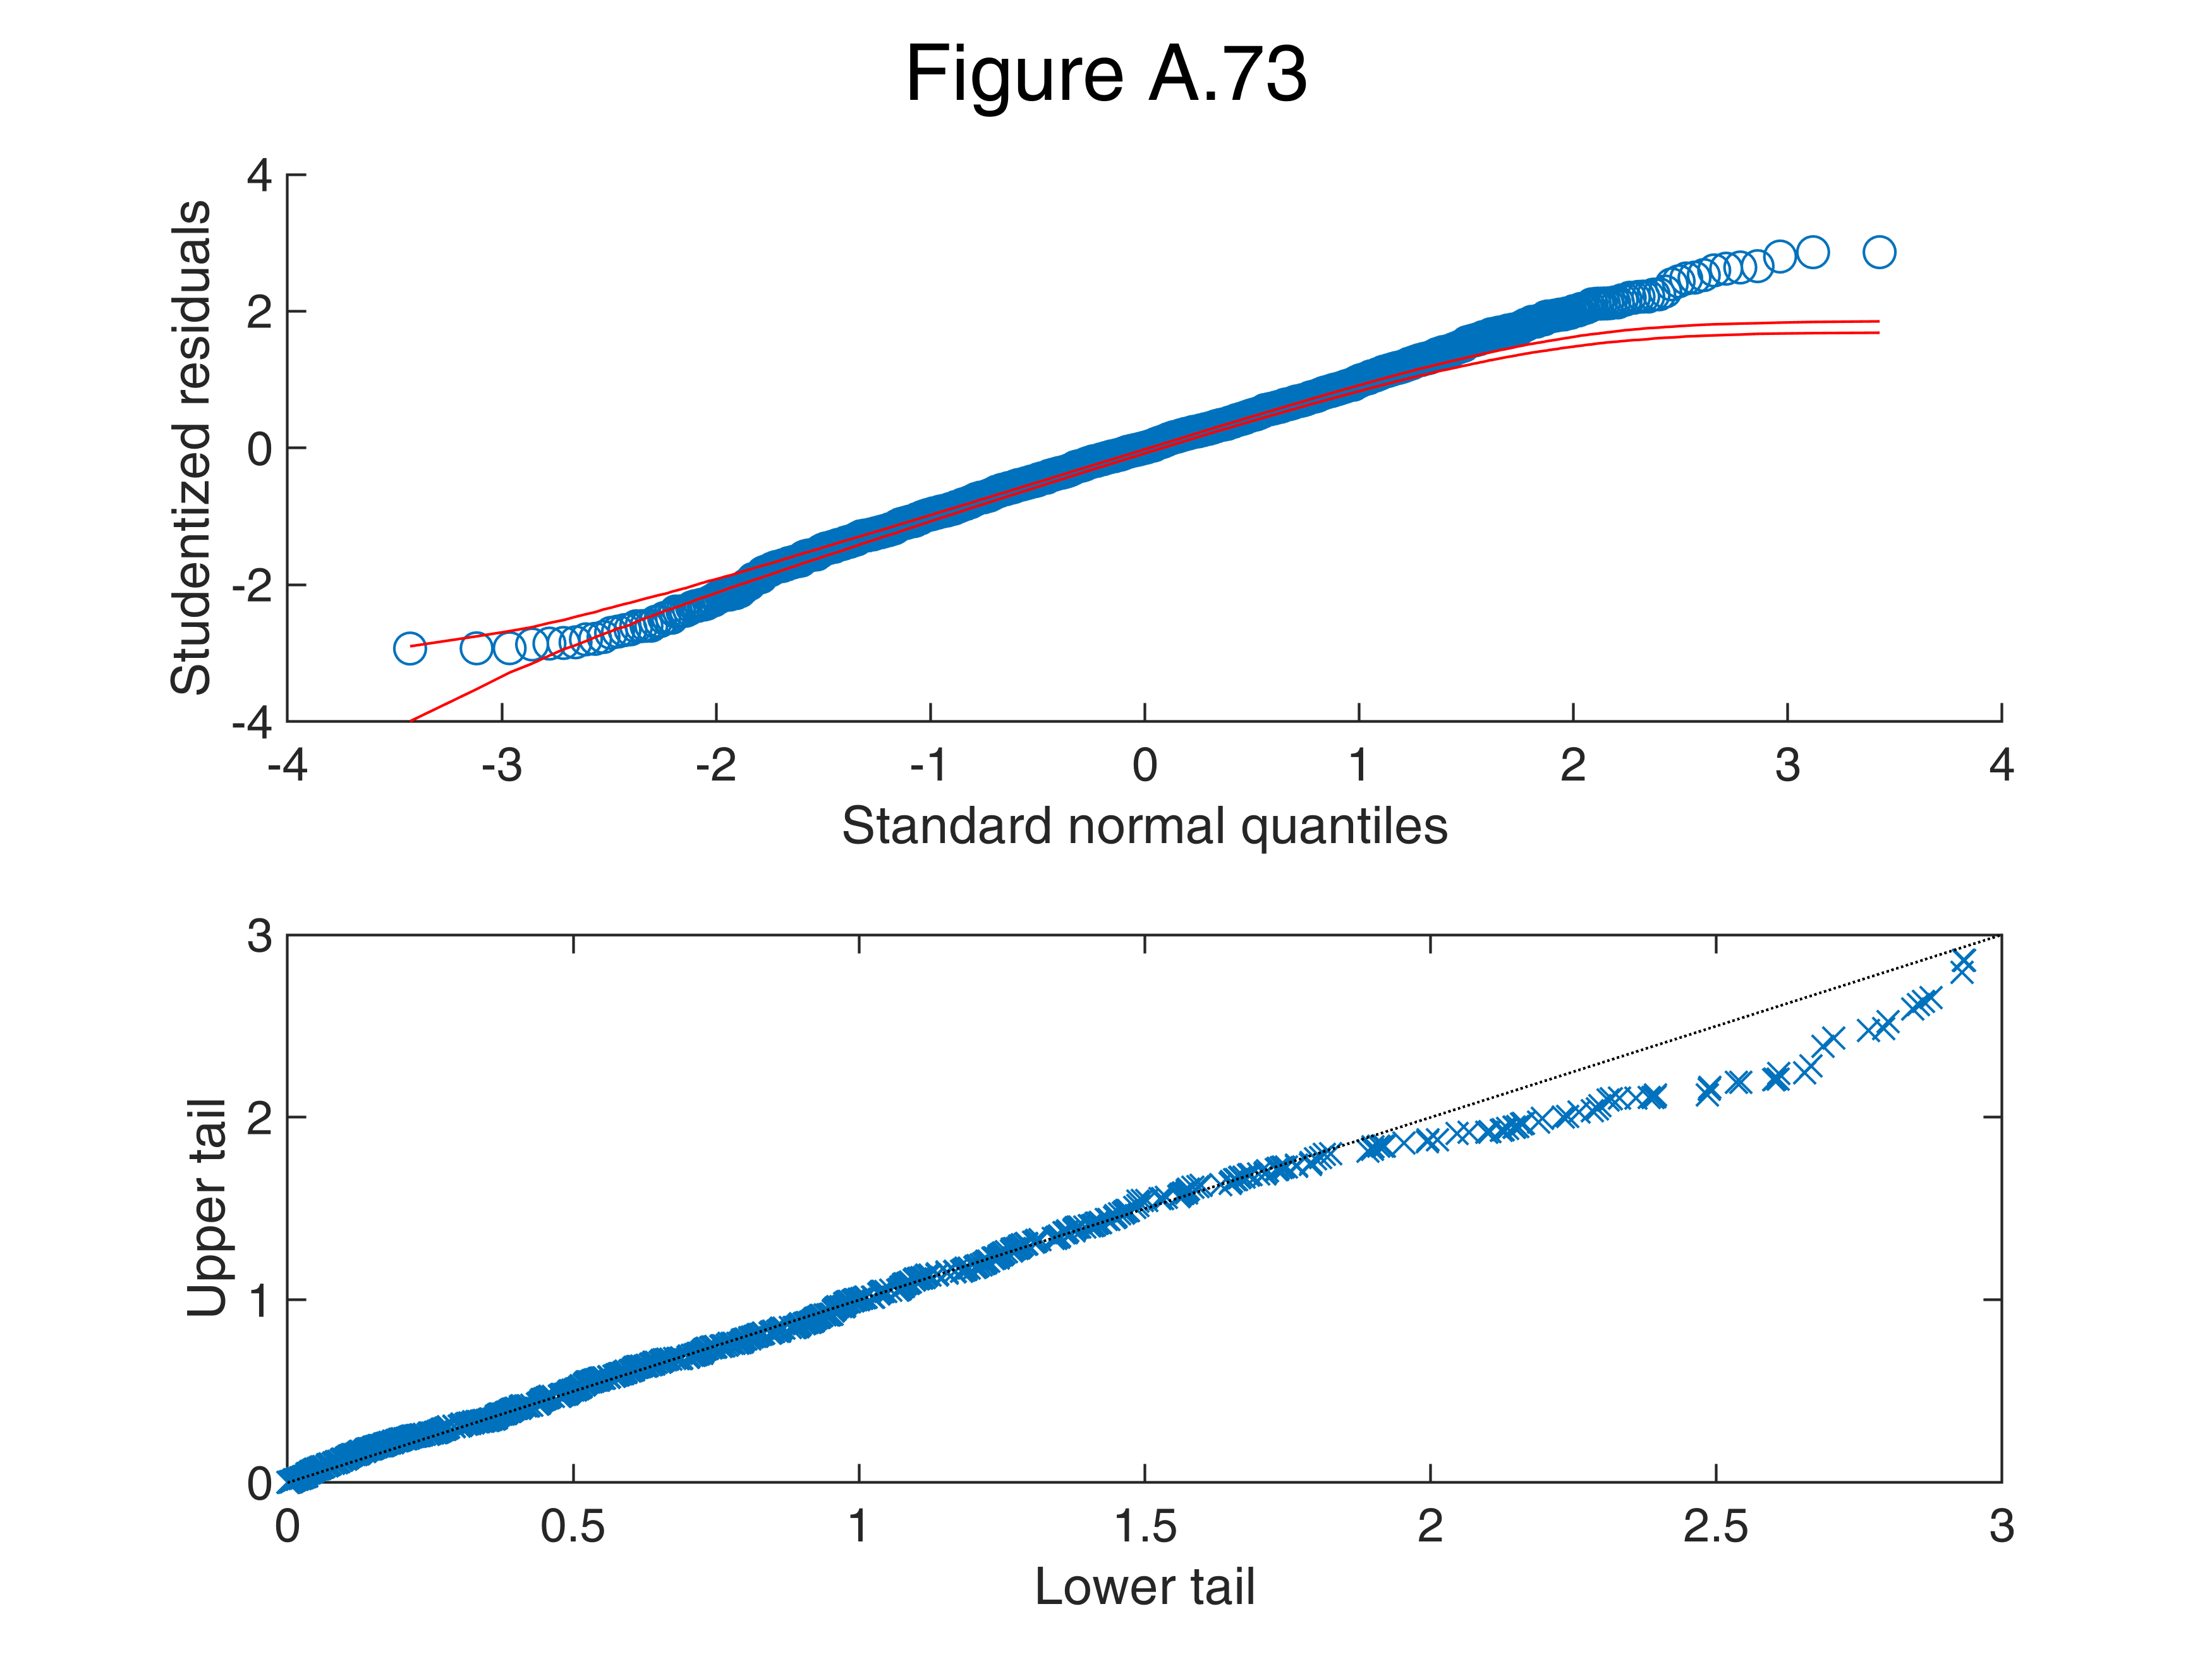

In [7]:

% plots of res in sqrt scale
mdl=fitlm(X,sqy,'Exclude',outsqrty.outliers,'VarNames',nameXy);

figure
h1=subplot(2,1,1);
res=mdl.Residuals{:,3};
qqplotFS(res,'X',X,'plots',1,'h',h1);

subplot(2,1,2)

plotResiduals(mdl,'symmetry','ResidualType','studentized')
title('')

if prin==1
    % print to postscript
    print -depsc figs\modCL8.eps;
else
    sgtitle('Figure A.73')
    set(gcf,"Name",'Figure A.73')
end

In [8]:
drawnow

## Create Figure A.74

FSRaddt in the model without the interactions sqrt scale


In [9]:
outADDt=FSRaddt(sqy,X,'plots',0);

Total estimated time to complete LMS:  0.04 seconds 
m=100
m=200
m=300
m=400
m=500
m=600
m=700
m=800
m=900
m=1000
m=1100
m=1200
m=1300
m=1400
m=1500
m=1600
m=1700
Total estimated time to complete LMS:  0.06 seconds 
m=100
m=200
m=300
m=400
m=500
m=600
Number of units which entered=11
m=700
m=800
m=900
m=1000
m=1100
m=1200
m=1300
m=1400
m=1500
m=1600
m=1700
Total estimated time to complete LMS:  0.06 seconds 
m=100
m=200
m=300
m=400
m=500
m=600
m=700
m=800
m=900
m=1000
m=1100
m=1200
m=1300
m=1400
m=1500
m=1600
m=1700
Total estimated time to complete LMS:  0.05 seconds 
m=100
m=200
m=300
m=400
m=500
m=600
m=700
m=800
m=900
m=1000
m=1100
m=1200
m=1300
m=1400
m=1500
m=1600
m=1700
Total estimated time to complete LMS:  0.06 seconds 
m=100
m=200
m=300
Number of units which entered=11
m=400
m=500
m=600
m=700
m=800
m=900
m=1000
m=1100
m=1200
m=1300
m=1400
m=1500
m=1600
m=1700
Total estimated time to complete LMS:  0.05 seconds 
m=100
m=200
m=300
m=400
m=500
m=600
m=700
m=800
m=900
m=1000
m=110


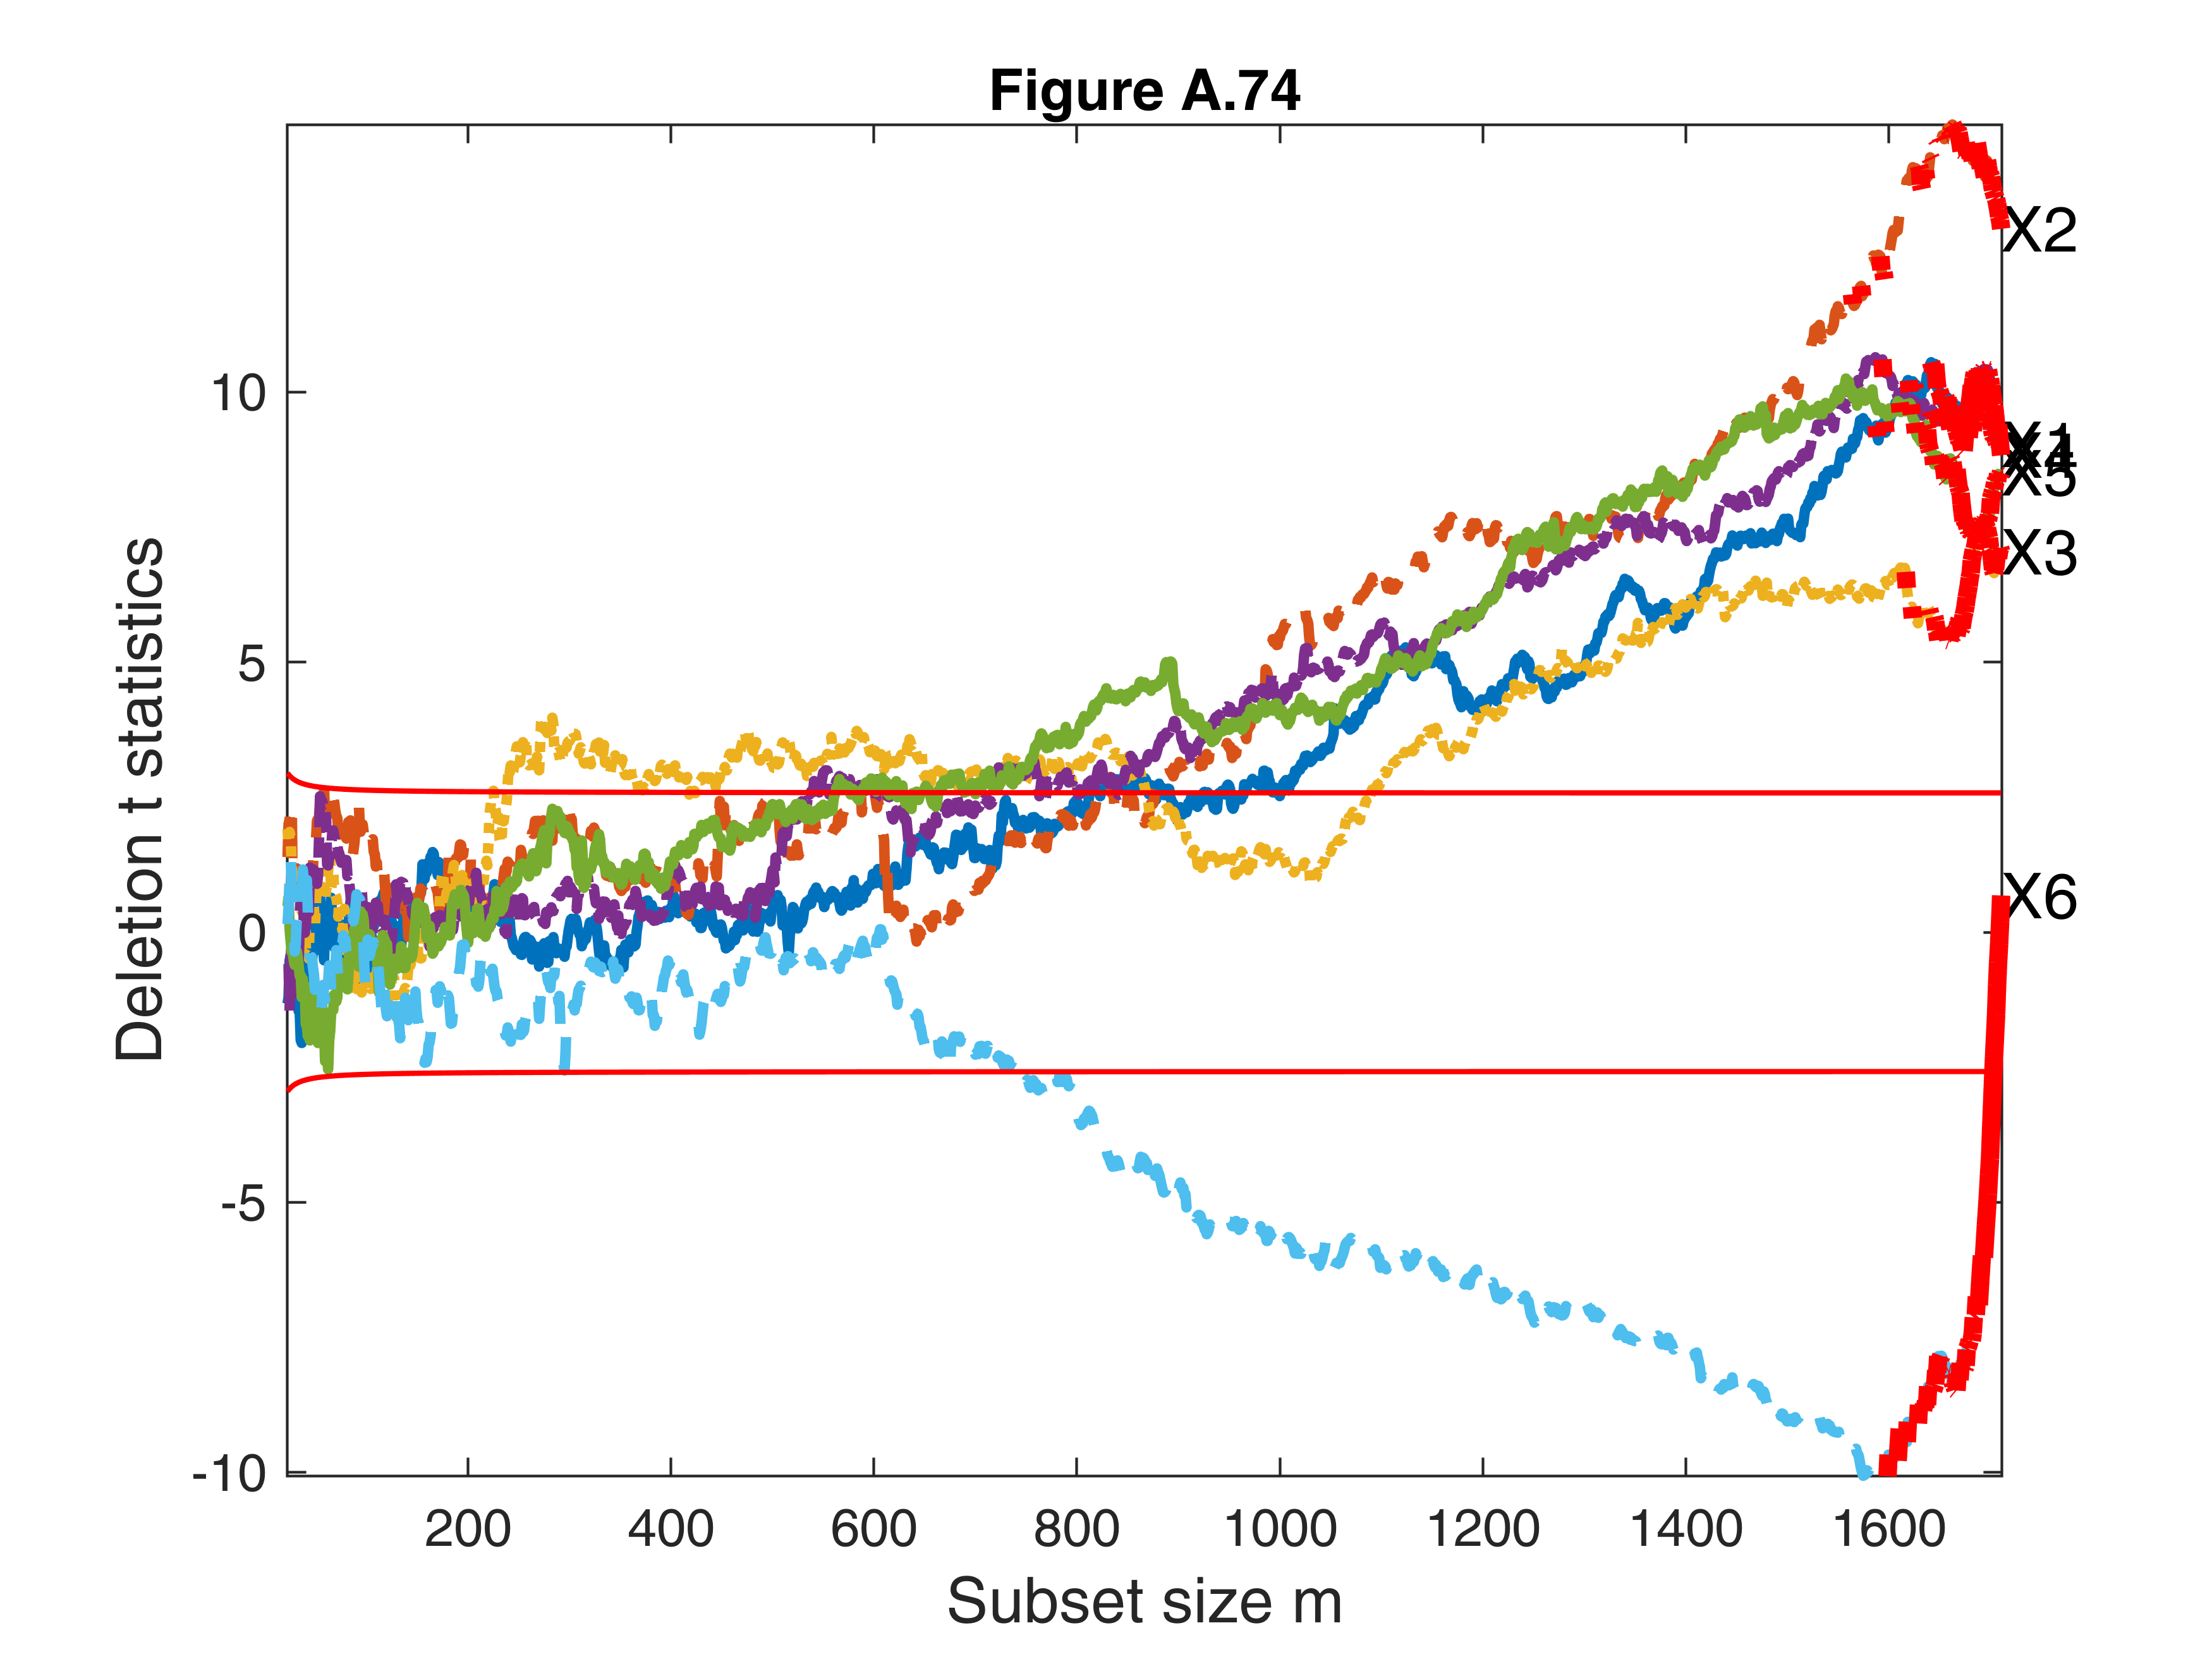

In [10]:
fanplotFS(outADDt,'highlight',outsqrty.outliers);
title('')
if prin==1
    % print to postscript
    print -depsc modCL6sqrt.eps;
else
    title('Figure A.74')
    set(gcf,"Name",'Figure A.74')
end

In [11]:

%InsideREADME